<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(0)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0'

In [4]:
os.listdir(base_path)

['data_add_delta_0_n20.csv',
 'data_add_delta_0_n30.csv',
 'data_add_delta_0_n60.csv',
 'data_add_delta_0_n120.csv',
 'data_add_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,21.318784,0.023143,221.965619,222.427128,-0.461509
1,0.0,1.0,57.329540,67.934475,53.739469,73.113487,-0.159493,261.957478,261.963518,-0.006040
2,0.0,2.0,45.215694,51.000161,43.520343,20.249812,1.668739,171.654749,170.377470,1.277279
3,0.0,3.0,69.375325,41.455180,64.082408,31.277210,1.335399,217.525522,216.394955,1.130567
4,0.0,4.0,87.837297,72.508079,90.676124,22.756257,0.282944,284.060701,285.161501,-1.100800
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.668823,85.656704,82.844701,83.375941,-0.719157,333.827012,334.429974,-0.602962
19996,999.0,16.0,32.528131,69.293629,61.272261,43.467023,1.002704,217.563748,216.470877,1.092871
19997,999.0,17.0,66.611319,58.322082,40.526764,93.147705,-1.145354,267.462517,268.079873,-0.617357
19998,999.0,18.0,62.498549,47.605046,61.629060,26.304486,0.593069,208.630210,208.412264,0.217947


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,21.318784,0.023143,221.965619,222.427128,-0.461509
1,0.0,1.0,57.329540,67.934475,53.739469,73.113487,-0.159493,261.957478,261.963518,-0.006040
2,0.0,2.0,45.215694,51.000161,43.520343,20.249812,1.668739,171.654749,170.377470,1.277279
3,0.0,3.0,69.375325,41.455180,64.082408,31.277210,1.335399,217.525522,216.394955,1.130567
4,0.0,4.0,87.837297,72.508079,90.676124,22.756257,0.282944,284.060701,285.161501,-1.100800
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.668823,85.656704,82.844701,83.375941,-0.719157,333.827012,334.429974,-0.602962
19996,999.0,16.0,32.528131,69.293629,61.272261,43.467023,1.002704,217.563748,216.470877,1.092871
19997,999.0,17.0,66.611319,58.322082,40.526764,93.147705,-1.145354,267.462517,268.079873,-0.617357
19998,999.0,18.0,62.498549,47.605046,61.629060,26.304486,0.593069,208.630210,208.412264,0.217947


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    68.854520  40.586643  81.182530  21.318784  0.023143  221.965619   
      1.0    57.329540  67.934475  53.739469  73.113487 -0.159493  261.957478   
      2.0    45.215694  51.000161  43.520343  20.249812  1.668739  171.654749   
      3.0    69.375325  41.455180  64.082408  31.277210  1.335399  217.525522   
      4.0    87.837297  72.508079  90.676124  22.756257  0.282944  284.060701   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   72.668823  85.656704  82.844701  83.375941 -0.719157  333.827012   
      16.0   32.528131  69.293629  61.272261  43.467023  1.002704  217.563748   
      17.0   66.611319  58.322082  40.526764  93.147705 -1.145354  267.462517   
      18.0   62.498549  47.605046  61.629060  26.304486  0.593069  208.630210   
      19.0   97.498954  65.491149  75.274027  52.091451  1.568800  301.924381   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    222.427128 -0.461509  
      1.0    261.963518 -0.006040  
      2.0    170.377470  1.277279  
      3.0    216.394955  1.130567  
      4.0    285.161501 -1.100800  
...                 ...       ...  
999.0 15.0   334.429974 -0.602962  
      16.0   216.470877  1.092871  
      17.0   268.079873 -0.617357  
      18.0   208.412264  0.217947  
      19.0   300.768460  1.155921  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    68.854520  40.586643  81.182530  21.318784  0.023143  221.965619   
      1.0    57.329540  67.934475  53.739469  73.113487 -0.159493  261.957478   
      2.0    45.215694  51.000161  43.520343  20.249812  1.668739  171.654749   
      3.0    69.375325  41.455180  64.082408  31.277210  1.335399  217.525522   
      4.0    87.837297  72.508079  90.676124  22.756257  0.282944  284.060701   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   72.668823  85.656704  82.844701  83.375941 -0.719157  333.827012   
      16.0   32.528131  69.293629  61.272261  43.467023  1.002704  217.563748   
      17.0   66.611319  58.322082  40.526764  93.147705 -1.145354  267.462517   
      18.0   62.498549  47.605046  61.629060  26.304486  0.593069  208.630210   
      19.0   97.498954  65.491149  75.274027  52.091451  1.568800  301.924381   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    222.427128 -0.461509  
      1.0    261.963518 -0.006040  
      2.0    170.377470  1.277279  
      3.0    216.394955  1.130567  
      4.0    285.161501 -1.100800  
...                 ...       ...  
999.0 15.0   334.429974 -0.602962  
      16.0   216.470877  1.092871  
      17.0   268.079873 -0.617357  
      18.0   208.412264  0.217947  
      19.0   300.768460  1.155921  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,21.318784,0.023143,221.965619,222.427128,-0.461509
1,0.0,1.0,57.329540,67.934475,53.739469,73.113487,-0.159493,261.957478,261.963518,-0.006040
2,0.0,2.0,45.215694,51.000161,43.520343,20.249812,1.668739,171.654749,170.377470,1.277279
3,0.0,3.0,69.375325,41.455180,64.082408,31.277210,1.335399,217.525522,216.394955,1.130567
4,0.0,4.0,87.837297,72.508079,90.676124,22.756257,0.282944,284.060701,285.161501,-1.100800
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.668823,85.656704,82.844701,83.375941,-0.719157,333.827012,334.429974,-0.602962
19996,999.0,16.0,32.528131,69.293629,61.272261,43.467023,1.002704,217.563748,216.470877,1.092871
19997,999.0,17.0,66.611319,58.322082,40.526764,93.147705,-1.145354,267.462517,268.079873,-0.617357
19998,999.0,18.0,62.498549,47.605046,61.629060,26.304486,0.593069,208.630210,208.412264,0.217947


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    68.854520  40.586643  81.182530  21.318784  0.023143  221.965619   
      1.0    57.329540  67.934475  53.739469  73.113487 -0.159493  261.957478   
      2.0    45.215694  51.000161  43.520343  20.249812  1.668739  171.654749   
      3.0    69.375325  41.455180  64.082408  31.277210  1.335399  217.525522   
      4.0    87.837297  72.508079  90.676124  22.756257  0.282944  284.060701   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   72.668823  85.656704  82.844701  83.375941 -0.719157  333.827012   
      16.0   32.528131  69.293629  61.272261  43.467023  1.002704  217.563748   
      17.0   66.611319  58.322082  40.526764  93.147705 -1.145354  267.462517   
      18.0   62.498549  47.605046  61.629060  26.304486  0.593069  208.630210   
      19.0   97.498954  65.491149  75.274027  52.091451  1.568800  301.924381   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    222.427128 -0.461509  
      1.0    261.963518 -0.006040  
      2.0    170.377470  1.277279  
      3.0    216.394955  1.130567  
      4.0    285.161501 -1.100800  
...                 ...       ...  
999.0 15.0   334.429974 -0.602962  
      16.0   216.470877  1.092871  
      17.0   268.079873 -0.617357  
      18.0   208.412264  0.217947  
      19.0   300.768460  1.155921  

[20000 rows x 8 columns]

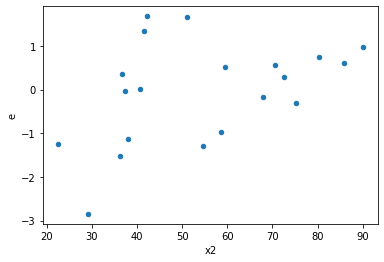

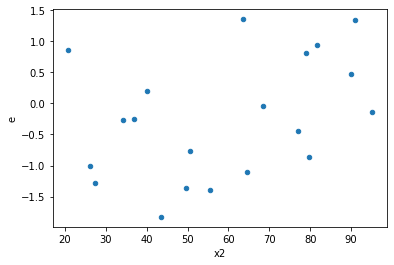

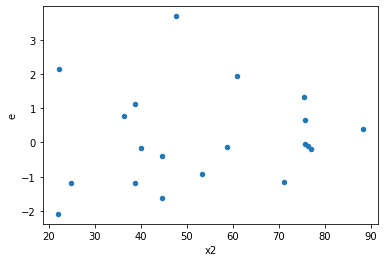

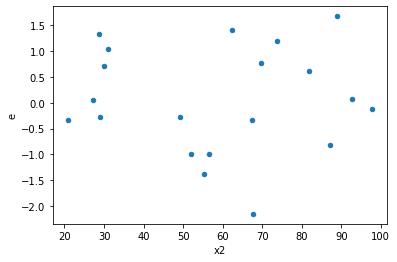

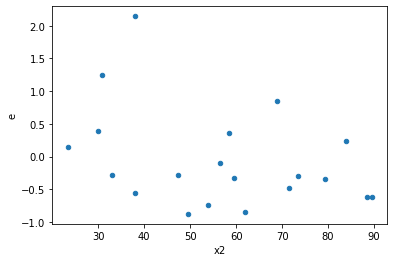

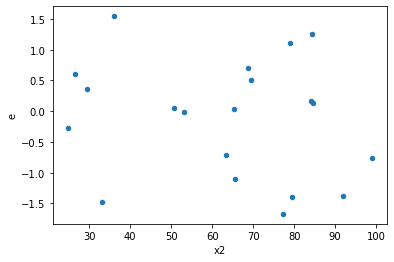

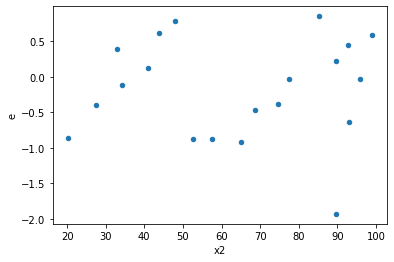

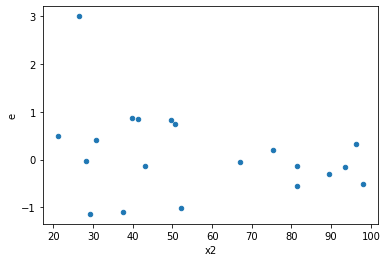

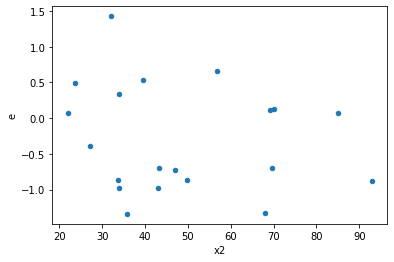

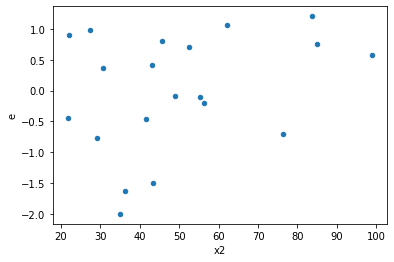

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,5.0,5.0,536.5704741204573,1454.3071103535665,107.31409482409147,290.8614220707133,2.7103748351741803,0.29785531992211567,0.8510723400389422,0.14892765996105783,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,1371.3898838587224,1657.8085213381785,274.2779767717445,331.5617042676357,1.208852814834503,0.8401990573445683,0.5799004713277158,0.4200995286722842,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,889.2253662663727,2057.338560138257,177.84507325327453,411.4677120276514,2.313630085448967,0.3786086426126425,0.8106956786936788,0.18930432130632124,Reject001=1 : Homoscedasticity
12.0,5.0,5.0,620.6918940964892,1819.970026160754,124.13837881929786,363.9940052321508,2.932163354267732,0.26276310301788364,0.8686184484910582,0.13138155150894182,Reject001=1 : Homoscedasticity
13.0,5.0,5.0,1343.8916959413928,1397.4576472396766,268.77833918827855,279.4915294479353,1.03985883048467,0.9668342073197618,0.5165828963401191,0.4834171036598809,Reject001=1 : Homoscedasticity
15.0,5.0,5.0,2035.8679128681233,2124.1265188725106,407.1735825736247,424.8253037745021,1.0433518331157587,0.9639906383241637,0.5180046808379182,0.4819953191620818,Reject001=1 : Homoscedasticity
16.0,5.0,5.0,658.0460312207648,707.484077662712,131.60920624415297,141.4968155325424,1.075128553469478,0.9385779633524232,0.5307110183237884,0.4692889816762116,Reject001=1 : Homoscedasticity
17.0,5.0,5.0,1322.5748956521231,2474.009978810728,264.51497913042465,494.8019957621456,1.8706010426659927,0.5084811610236792,0.7457594194881604,0.2542405805118396,Reject001=1 : Homoscedasticity
19.0,5.0,5.0,998.13810800276,1059.1373734921824,199.627621600552,211.82747469843648,1.0611130513907336,0.9496858560182952,0.5251570719908524,0.4748429280091476,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,1797.7980099103145,1347.1883100279101,359.5596019820629,269.437662005582,0.7493546564194474,0.759251424685667,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,2224.7412419658067,736.2159859913801,444.94824839316135,147.24319719827602,0.3309220740389796,0.25018158612128144,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,536.5704741204573,1454.3071103535665,107.31409482409147,290.8614220707133,2.7103748351741803,0.29785531992211567,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,3567.948859000764,2502.196291622977,713.5897718001528,500.43925832459536,0.701298250200744,0.7065109823392334,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,1371.3898838587224,1657.8085213381785,274.2779767717445,331.5617042676357,1.208852814834503,0.8401990573445683,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,889.2253662663727,2057.338560138257,177.84507325327453,411.4677120276514,2.313630085448967,0.3786086426126425,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,1674.0701856275264,192.0667540477231,334.81403712550525,38.41335080954462,0.11473040718165992,0.03293430186030253,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,1028.4891171674315,509.8498040434365,205.6978234334863,101.9699608086873,0.49572698002640725,0.4596150106626671,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,332.2792936192824,293.3402451836232,66.45585872385648,58.66804903672464,0.8828122932021318,0.8945413153673311,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      984
Reject001=0 : Heteroscedasticity     16
Name: Result_test, dtype: int64